In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datos = pd.read_csv('data/train.csv')

In [3]:
datos.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [8]:
datos.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [21]:
datos.tipodepropiedad.unique()

array(['Apartamento', 'Casa en condominio', 'Casa', 'Terreno',
       'Terreno comercial', 'Local Comercial', 'Quinta Vacacional',
       'Oficina comercial', 'Edificio', 'Casa uso de suelo',
       'Local en centro comercial', 'Bodega comercial', 'Otros', 'Villa',
       'Duplex', 'Inmuebles productivos urbanos',
       'Departamento Compartido', 'Nave industrial', 'Rancho',
       'Terreno industrial', nan, 'Huerta', 'Lote', 'Hospedaje', 'Garage'],
      dtype=object)

In [150]:
usoResidencial = ['Apartamento', 'Casa en condominio', 'Casa', 'Quinta Vacacional', 'Edificio', 'Villa', 'Duplex', 'Departamento Compartido', 'Rancho', 'Hospedaje']
usoComercial = ['Terreno comercial', 'Local Comercial', 'Oficina comercial', 'Local en centro comercial', 'Bodega comercial', 'Inmuebles productivos urbanos', 'Nave industrial', 'Terreno industrial', 'Garage']
usoDeSuelo = ['Terreno', 'Casa uso de suelo', 'Huerta', 'Lote']

In [161]:
residenciales = datos[datos['tipodepropiedad'].isin(usoResidencial)]
comerciales = datos[datos['tipodepropiedad'].isin(usoComercial)]
terrenos = datos[datos['tipodepropiedad'].isin(usoDeSuelo)]
print('residenciales:', residenciales['tipodepropiedad'].count())
print('comerciales:', comerciales['tipodepropiedad'].count())
print('terrenos:', terrenos['tipodepropiedad'].count())

residenciales: 221141
comerciales: 8001
terrenos: 10678


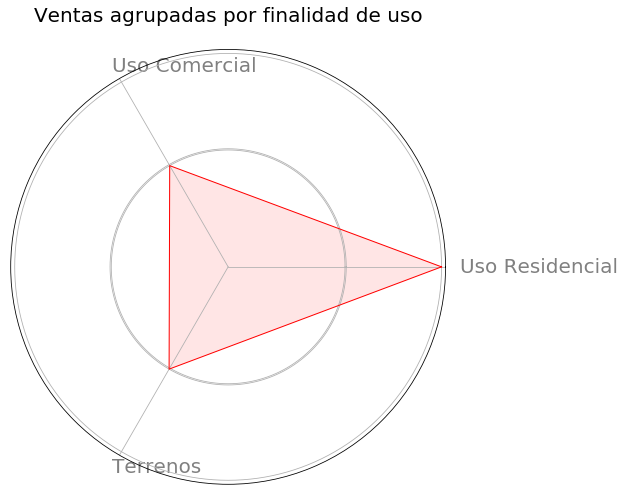

In [250]:
from math import pi
categorias = ['Uso Residencial', 'Uso Comercial', 'Terrenos']
N = len(categorias)
cantidades = [residenciales['tipodepropiedad'].count(), comerciales['tipodepropiedad'].count(), terrenos['tipodepropiedad'].count(), residenciales['tipodepropiedad'].count()]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles
plt.figure(figsize=(12,8))
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categorias, color='grey', size=20,horizontalalignment="left")
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([8001, 10678, 221141],[], color="grey", size=10)
plt.ylim(-250000,230000)
plt.title('Ventas agrupadas por finalidad de uso', fontsize=20)
# Plot data
ax.plot(angles, cantidades, 'red', linewidth=1, linestyle='solid')
# Fill area"Sony", 
ax.fill(angles, cantidades, 'red', alpha=0.1)

Para realizar este gráfico se consideró interesante dividir las ventas de acuerdo al uso que le fueran a dar los compradores. De aquí, surge que la gran mayoría de las ventas fueron adquiridas con finalidad de uso residencial, es decir casas, departamentos, duplex, etc. Luego le sigue muy por detrás las propiedades destinadas a uso comercial y por último, los terrenos.

In [144]:
casas = ['Apartamento', 'Casa en condominio', 'Casa', 'Quinta Vacacional', 'Edificio', 'Villa', 'Duplex', 'Inmuebles productivos urbanos', 'Departamento Compartido', 'Rancho', 'Hospedaje']

In [48]:
datos = datos[['tipodepropiedad', 'gimnasio', 'usosmultiples', 'piscina']]
datos.dropna()
datos.head()

,tipodepropiedad,gimnasio,usosmultiples,piscina
0,Apartamento,0.0,0.0,0.0
1,Casa en condominio,0.0,0.0,0.0
2,Casa,0.0,0.0,0.0
3,Casa,0.0,0.0,0.0
4,Apartamento,0.0,0.0,0.0


In [143]:
conGym = datos[datos['gimnasio']== True]
print(conGym['tipodepropiedad'].unique())
conGym['tipodepropiedad'].count()

['Apartamento' 'Casa' 'Casa en condominio' 'Departamento Compartido'
 'Oficina comercial' 'Terreno']


14994

In [142]:
conSum = datos[datos['usosmultiples'] == True]
print(conSum['tipodepropiedad'].unique())
conSum['tipodepropiedad'].count()

['Casa' 'Casa en condominio' 'Apartamento' 'Departamento Compartido'
 'Oficina comercial' 'Edificio']


13222

In [140]:
conPileta = datos[datos['piscina'] == True]
print(conPileta['tipodepropiedad'].unique())
conPileta['tipodepropiedad'].count()

['Terreno' 'Casa en condominio' 'Apartamento' 'Casa' 'Quinta Vacacional'
 'Villa' 'Departamento Compartido' 'Rancho' 'Oficina comercial' nan
 'Terreno comercial' 'Edificio']


20971

In [138]:
conGymSumPileta = datos[(datos['gimnasio'] == True) & (datos['usosmultiples'] == True) & (datos['piscina'] == True)]
print(conGymSumPileta['tipodepropiedad'].unique())
conGymSumPileta['tipodepropiedad'].count()

['Apartamento' 'Casa en condominio' 'Casa' 'Departamento Compartido'
 'Oficina comercial']


4327

In [145]:
datos[(datos['habitaciones'] == 3) & (datos['tipodepropiedad'] == 'Terreno')]

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
843,204742,"cuautitlan, san mateo ixtacalco, terreno",<p>excelente terreno plano a 10 minutos del ce...,Terreno,NaN,Cuautitlán,Edo. de México,NaN,3.0,NaN,...,NaN,19.695352,-99.164340,2014-11-25 00:00:00,0.0,0.0,0.0,0.0,0.0,1500000.0
1606,61529,terreno de 10 x 25 col. francisco villa cercas...,terreno de 10 x 25 m con obra negra de 65 m2 p...,Terreno,EDMUNDO GOMEZ OROZCO No. 3696,Guadalajara,Jalisco,NaN,3.0,1.0,...,47668.0,20.615949,-103.367526,2016-10-30 00:00:00,0.0,0.0,0.0,0.0,0.0,750000.0
2003,153743,terreno 1000 m2,<p>terreno de 1000 m2 excelente para desarroll...,Terreno,NaN,Boca del Río,Veracruz,0.0,3.0,0.0,...,110511.0,NaN,NaN,2013-10-29 00:00:00,0.0,0.0,0.0,0.0,0.0,2200000.0
3831,241044,venta de rancho de 12 hectareas en jilotepec,superficie y datos generales\r\n\r\n doce (12...,Terreno,"Jilotepec, Mataxhi",Jilotepec,Edo. de México,NaN,3.0,0.0,...,56474.0,NaN,NaN,2014-01-28 00:00:00,0.0,0.0,0.0,0.0,0.0,3900000.0
5696,226189,"condominio en el corazon col del valle, 3 rec,...","condominio para remodelar, muy amplio 165 mts,...",Terreno,ADOLFO PRIETO NO 523-102,Benito Juárez,Distrito Federal,NaN,3.0,1.0,...,50003995.0,NaN,NaN,2015-11-27 00:00:00,0.0,0.0,0.0,1.0,0.0,3350000.0
5777,45977,bodega en venta o renta,"excelente bodega en venta o renta, o se renta...",Terreno,TOTONACAS AJUSCO COYOACAN,Coyoacán,Distrito Federal,10.0,3.0,2.0,...,23606.0,NaN,NaN,2016-02-07 00:00:00,0.0,0.0,0.0,1.0,1.0,1400000.0
6959,197740,rancho santa ana s/n,"<p>casa de campo con amplio terreno de 2,400 m...",Terreno,NaN,Huasca de Ocampo,Hidalgo,0.0,3.0,0.0,...,125202.0,20.211631,-98.577255,2013-10-06 00:00:00,0.0,0.0,0.0,0.0,0.0,1400000.0
10284,237856,iztacalco terreno con construcción excelente,iztacalco terreno cerca plutarco elias calles ...,Terreno,sur181,Iztacalco,Distrito Federal,NaN,3.0,1.0,...,24102.0,NaN,NaN,2016-06-19 00:00:00,0.0,0.0,0.0,1.0,1.0,1500000.0
11219,34873,excelente terreno con casa en construcción (el...,<p>casa en construcción (obra negra); en ampli...,Terreno,Camino a las Caleras,Monterrey,Nuevo León,NaN,3.0,NaN,...,69254.0,25.567593,-100.237761,2016-05-16 00:00:00,0.0,0.0,0.0,1.0,0.0,5500000.0
13351,64681,se vende terreno en villa del carbon!!,terreno bardeado de 13000 metros de terreno y ...,Terreno,Alfredo del Mazo s/n,Villa del Carbón,Edo. de México,NaN,3.0,0.0,...,56514.0,NaN,NaN,2016-10-28 00:00:00,0.0,0.0,0.0,0.0,0.0,8250000.0


In [9]:
datos['habitaciones'].value_counts()

3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

In [146]:
habitaciones = datos[datos['tipodepropiedad'].isin(casas)]
habitaciones = habitaciones['habitaciones'].value_counts().reset_index().rename(columns={'index': 'habitaciones', 'habitaciones': 'cantidad'})
habitaciones = habitaciones.sort_values('habitaciones')
habitaciones

,habitaciones,cantidad
3,1.0,4703
1,2.0,57393
0,3.0,121360
2,4.0,24735
4,5.0,4448
5,6.0,1579
6,7.0,492
7,8.0,356
9,9.0,154
8,10.0,259


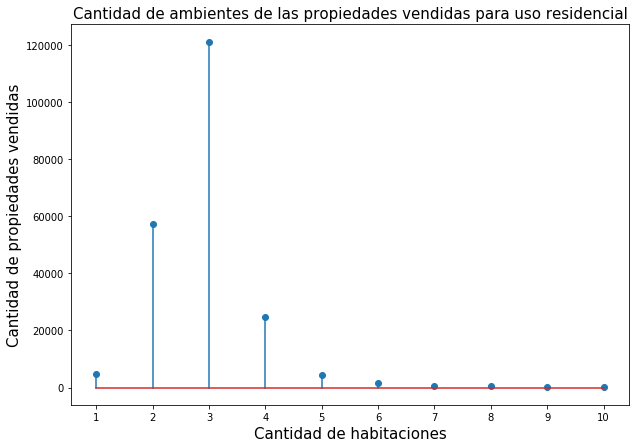

In [147]:
plt.figure(figsize=(10,7))
plt.stem(habitaciones.habitaciones, habitaciones.cantidad)
plt.xticks(habitaciones.habitaciones)
plt.xlabel('Cantidad de habitaciones', fontsize=15)
plt.ylabel('Cantidad de propiedades vendidas', fontsize=15)
plt.title('Cantidad de ambientes de las propiedades vendidas para uso residencial', fontsize=15)
plt.show()

En el gráfico se puede observar que la mayoria de las propiedades adquiridas para residencia (casa, departamento, duplex, etc) tienen 3 habitaciones. Luego completan el podio aquellas que tienen 2 y 4 habitaciones. Cada una de las restantes no superan las 4800 ventas, muy por debajo de las tres primeras.